###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###[Scatter plot - 산점도](https://ko.wikipedia.org/wiki/%EC%82%B0%EC%A0%90%EB%8F%84)
- 두 변수간의 관계를 나타낼 수 있는 그래프 타입
- 선형, 비선형 모델을 확인할수 있음
- 이상치를 알 수 있음
  - 이상치(이상점) :  실험 또는 관찰을 통하여 데이터를 수집하였을 때, 데이터의 전반적인 흐름에서 벗어나는 관측점이다.

####scatterplot 실습에 사용할 데이터
- tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [36]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


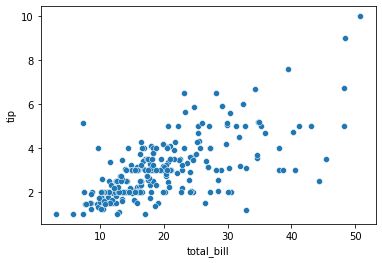

In [9]:
#x='total_bill', y='tip' 의 상관관계
scatterplot= sns.scatterplot(data=tips, x='total_bill', y='tip')

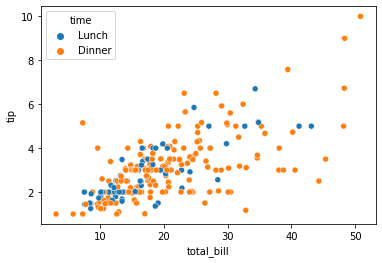

In [10]:
#hue 옵션의 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

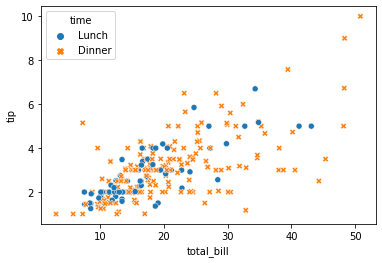

In [13]:
#hue 옵션으로 time, style 옵션에 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')

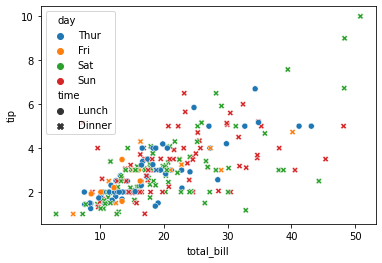

In [18]:
#x='total_bill', y='tip' 의 상관관계
#hue 옵션으로 day, style 옵션에 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='day',style='time')

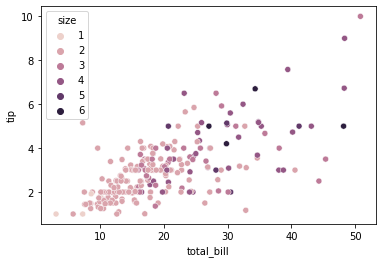

In [43]:
#hue옵션으로 size를 지정
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

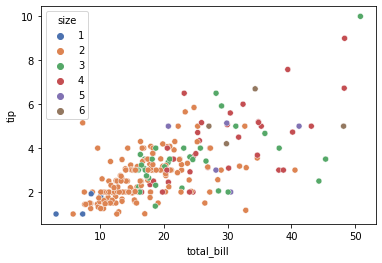

In [51]:
#palette에 deep값을 지정
#palette를 변경하면 테마를 변경할 수 있다.
scatterplot = sns.scatterplot(data=tips,x='total_bill',y='tip',hue='size',palette='deep')

pd.eval() 옵션을 사용하는 방법과 사용하지 않는 방법.

float64


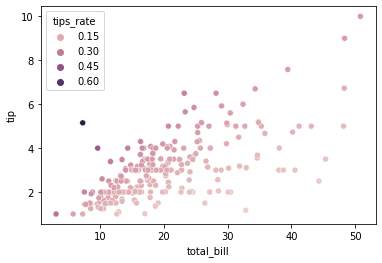

In [64]:
#tips_rate 특성을 만들어내고 hue옵션에 사용
tips['tips_rate'] = tips.eval('tip/total_bill')
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')

float64


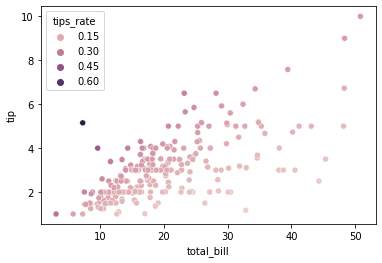

In [65]:
tips_rate = tips.eval('tip/total_bill').rename('tip_rate')
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')

float64


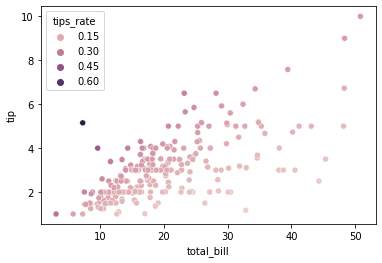

In [66]:
tips['tips_rate'] =  tips['tip'] / tips['total_bill']
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')